In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [26]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


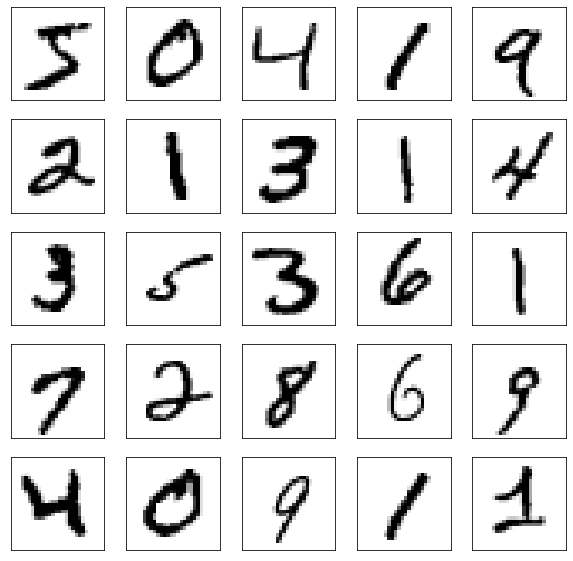

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [29]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [30]:
X_train /= 255
X_test /= 255

In [31]:
from keras.utils import np_utils
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [33]:
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential

In [36]:
model = tf.keras.Sequential([
# convolutional layer
  layers.Conv2D(25, 3, activation='relu',input_shape=(28,28,1)),
  layers.MaxPooling2D(),
  layers.Conv2D(50, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(75, 3, activation='relu'),
# flatten output of conv
  layers.Flatten(),
# hidden layer
  layers.Dense(500, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(250, activation='relu'),
  layers.Dropout(0.3),
# output layer
  layers.Dense(10, activation='softmax'),
])

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 50)        11300     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 75)          33825     
_________________________________________________________________
flatten_3 (Flatten)          (None, 675)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)              

In [38]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 42s 88ms/step - loss: 0.5221 - accuracy: 0.8321 - val_loss: 0.0444 - val_accuracy: 0.9859
Epoch 2/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0618 - accuracy: 0.9813 - val_loss: 0.0459 - val_accuracy: 0.9855
Epoch 3/10
469/469 [==============================] - 41s 86ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 4/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0303 - val_accuracy: 0.9909
Epoch 5/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0337 - val_accuracy: 0.9906
Epoch 6/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0226 - accuracy: 0.9935 - val_loss: 0.0346 - val_accuracy: 0.9902
Epoch 7/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0275 - val_accuracy:

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9904000163078308


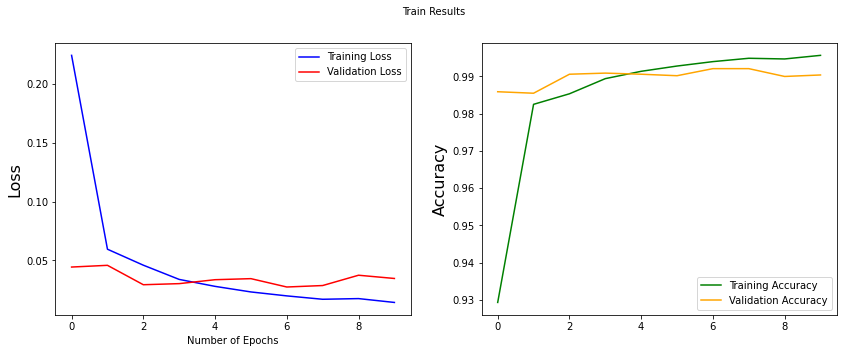

In [40]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()